Import libraries:

In [57]:
import numpy as np
import pandas as pd
try:
  from empiricaldist import Pmf
except:
  !pip install empiricaldist
import matplotlib.pyplot as plt
from scipy.stats import binom

#**Exercise:** 

Let’s use Bayes’s Rule to solve the Elvis problem from [Distributions](https://github.com/iamzehan/think_bayes/blob/main/Chapter%203/Ch%203%20%20Studies.ipynb):

* Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin?

* In 1935, about 2/3 of twins were fraternal and 1/3 were identical. The question contains two pieces of information we can use to update this prior.

* First, Elvis’s twin was also male, which is more likely if they were identical twins, with a likelihood ratio of 2.

* Also, Elvis’s twin died at birth, which is more likely if they were identical twins, with a likelihood ratio of 1.25.

In [5]:
def odds(p):
  return p/(1-p)
def prob(o):
  return o / (o+1)

In [6]:
prior_odds = odds(1/3)

In [7]:
post_odds = prior_odds * 2 * 1.25

In [8]:
prob(post_odds)

0.5555555555555555

In [9]:
prob(3/2)

0.6

In [10]:
def prob2(yes, no):
    return yes / (yes + no)

In [12]:
prob2(3,2)

0.6

#**Exercise:** 
The following is an interview question that appeared on glassdoor.com, attributed to Facebook:

You’re about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independently if it’s raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that “Yes” it is raining. What is the probability that it’s actually raining in Seattle?

Use Bayes’s Rule to solve this problem. As a prior you can assume that it rains in Seattle about 10% of the time.

In [14]:
prior_odds=odds(0.1)

In [15]:
post_odds = prior_odds * 2 * 2 * 2

In [18]:
prob(post_odds)

0.4705882352941177

**Exercise:** [According to the CDC](https://www.cdc.gov/tobacco/data_statistics/fact_sheets/health_effects/effects_cig_smoking), people who smoke are about 25 times more likely to develop lung cancer than nonsmokers.

Also according to the CDC, about 14% of adults in the U.S. are smokers. If you learn that someone has lung cancer, what is the probability they are a smoker?

In [19]:
prior_odds = odds(0.14)

In [20]:
post_odds=prior_odds*25

In [21]:
prob(post_odds)

0.8027522935779816

##**Exercise:** 
In Dungeons & Dragons, the amount of damage a goblin can withstand is the sum of two six-sided dice. The amount of damage you inflict with a short sword is determined by rolling one six-sided die. A goblin is defeated if the total damage you inflict is greater than or equal to the amount it can withstand.

Suppose you are fighting a goblin and you have already inflicted 3 points of damage. What is your probability of defeating the goblin with your next successful attack?

Hint: You can use Pmf.add_dist to add a constant amount, like 3, to a `Pmf` and `Pmf.sub_dist` to compute the distribution of remaining points.

In [27]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    die = Pmf(1/sides, outcomes)
    return die

In [28]:
d6 = make_die(6)

In [29]:
# The amount the goblin can withstand is the sum of two d6
hit_points = Pmf.add_dist(d6, d6)

In [30]:
# The total damage after a second attack is one d6 + 3
damage = Pmf.add_dist(d6, 3)

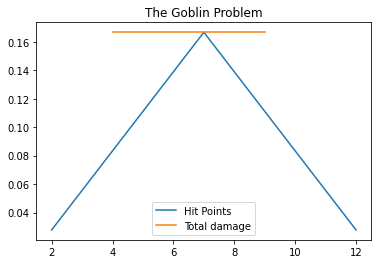

In [33]:
hit_points.plot()
damage.plot()
plt.title('The Goblin Problem')
plt.legend(['Hit Points','Total damage'])

In [34]:
points_left = Pmf.sub_dist(hit_points, damage)

In [35]:
#here's the probability that the goblin is dead
points_left.prob_le(0)

0.5

#**Exercise:**

Suppose I have a box with a 6-sided die, an 8-sided die, and a 12-sided die. I choose one of the dice at random, roll it twice, multiply the outcomes, and report that the product is 12. What is the probability that I chose the 8-sided die?

Hint: Pmf provides a function called mul_dist that takes two Pmf objects and returns a Pmf that represents the distribution of the product.

In [39]:
hypos = [6, 8, 12]
prior = Pmf(1, hypos)

In [37]:
# Here's the distribution of the product for the 4-sided die

d8 = make_die(8)
Pmf.mul_dist(d8, d8)

,probs
1,0.015625
2,0.031250
3,0.031250
4,0.046875
5,0.031250
6,0.062500
7,0.031250
8,0.062500
9,0.015625
10,0.031250


In [40]:
# Here's the likelihood of getting a 12 for each die
likelihood = []

for sides in hypos:
    die = make_die(sides)
    pmf = Pmf.mul_dist(die, die)
    likelihood.append(pmf[12])
    
likelihood

[0.1111111111111111, 0.0625, 0.041666666666666664]

In [41]:
# Solution

# And here's the update
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
6,0.516129
8,0.290323
12,0.193548


#**Exercise:**
*Betrayal at House on the Hill* is a strategy game in which characters with different attributes explore a haunted house. Depending on their attributes, the characters roll different numbers of dice. For example, if attempting a task that depends on knowledge, Professor Longfellow rolls 5 dice, Madame Zostra rolls 4, and Ox Bellows rolls 3. Each die yields 0, 1, or 2 with equal probability.

If a randomly chosen character attempts a task three times and rolls a total of 3 on the first attempt, 4 on the second, and 5 on the third, which character do you think it was?

In [42]:
die = Pmf(1/3, [0,1,2])
die

,probs
0,0.333333
1,0.333333
2,0.333333


In [44]:
def add_dist_seq(seq):
    """Compute Pmf of the sum of values from seq."""
    total = seq[0]
    for other in seq[1:]:
        total = total.add_dist(other)
    return total

In [45]:
pmfs = {}
pmfs['Bellows'] = add_dist_seq([die]*3)
pmfs['Zostra'] = add_dist_seq([die]*4)
pmfs['Longfellow'] = add_dist_seq([die]*5)

In [46]:
pmfs['Zostra'](4)

0.2345679012345679

In [47]:
pmfs['Zostra']([3,4,5]).prod()

0.00915247412224499

In [48]:
hypos = pmfs.keys()
prior = Pmf(1/3, hypos)
prior

,probs
Bellows,0.333333
Zostra,0.333333
Longfellow,0.333333


In [49]:
likelihood = prior.copy()

for hypo in hypos:
    likelihood[hypo] = pmfs[hypo]([3,4,5]).prod()

likelihood

,probs
Bellows,0.006401
Zostra,0.009152
Longfellow,0.004798


In [50]:
posterior = (prior * likelihood)
posterior.normalize()
posterior

,probs
Bellows,0.314534
Zostra,0.449704
Longfellow,0.235762


#**Exercise:** 
There are 538 members of the United States Congress. Suppose we audit their investment portfolios and find that 312 of them out-perform the market. Let’s assume that an honest member of Congress has only a 50% chance of out-performing the market, but a dishonest member who trades on inside information has a 90% chance. How many members of Congress are honest?

In [58]:
def make_binomial(n, p):
    """Make a binomial Pmf."""
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [59]:
n = 538

table = pd.DataFrame()

for n_honest in range(0, n+1):
    n_dishonest = n - n_honest
    dist_honest = make_binomial(n_honest, 0.5)
    dist_dishonest = make_binomial(n_dishonest, 0.9)
    dist_total = Pmf.add_dist(dist_honest, dist_dishonest)    
    table[n_honest] = dist_total
    
table.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.


(539, 539)

In [60]:
data = 312
likelihood = table.loc[312]
len(likelihood)

539

In [61]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)
len(prior)

539

In [62]:
posterior = prior * likelihood
posterior.normalize()
posterior.mean()

431.48821145019946

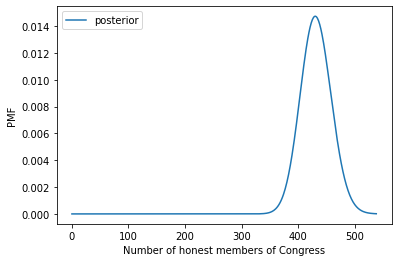

In [63]:
posterior.plot()
plt.xlabel('Number of honest members of Congress')
plt.ylabel('PMF')
plt.legend(['posterior'])

In [64]:
posterior.max_prob()

430

In [65]:
posterior.credible_interval(0.9)

array([388., 477.])